In [18]:
import string 
import re
import codecs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

In [19]:
english_df = pd.read_csv("europarl-v7.bg-en.en", encoding="utf-8", header=None, names=["English"], on_bad_lines='skip')


In [20]:
english_df.head()


,English
0,Membership of Parliament: see Minutes
1,Approval of Minutes of previous sitting: see M...
2,Membership of Parliament: see Minutes
3,Verification of credentials: see Minutes
4,Documents received: see Minutes


In [21]:
german_df = pd.read_csv("europarl-v7.de-en.de", encoding="utf-8", header=None, names=["German"], on_bad_lines='skip')
french_df = pd.read_csv("europarl-v7.fr-en.fr", encoding="utf-8", header=None, names=["French"], on_bad_lines='skip')
spanish_df = pd.read_csv("europarl-v7.es-en.es", encoding="utf-8", header=None, names=["Spanish"], on_bad_lines='skip')
bulgarian_df = pd.read_csv("europarl-v7.bg-en.bg", encoding="utf-8", header=None, names=["Bulgarian"], on_bad_lines='skip')
czech_df = pd.read_csv("europarl-v7.cs-en.cs", encoding="utf-8", header=None, names=["Czech"], on_bad_lines='skip')
danish_df = pd.read_csv("europarl-v7.da-en.da", encoding="utf-8", header=None, names=["Danish"], on_bad_lines='skip')
hungarian_df = pd.read_csv("europarl-v7.hu-en.hu", encoding="utf-8", header=None, names=["Hungarian"], on_bad_lines='skip')
latvian_df = pd.read_csv("europarl-v7.lv-en.lv", encoding="utf-8", header=None, names=["Latvian"], on_bad_lines='skip')
dutch_df = pd.read_csv("europarl-v7.nl-en.nl", encoding="utf-8", header=None, names=["Dutch"], on_bad_lines='skip')


In [22]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)


! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [23]:
data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [24]:
data_ger = []
lang_ger = []

for i, line in german_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [25]:
data_fre = []
lang_fre = []

for i, line in french_df.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

data_esp = []
lang_esp = []

for i, line in spanish_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")

data_bul = []
lang_bul = []

for i, line in bulgarian_df.iterrows():
    line = line['Bulgarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Bulgarian")


data_czech = []
lang_czech = []

for i, line in czech_df.iterrows():
    line = line['Czech']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Czech")

data_dan = []
lang_dan = []

for i, line in danish_df.iterrows():
    line = line['Danish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Danish")



data_hung = []
lang_hung = []

for i, line in hungarian_df.iterrows():
    line = line['Hungarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Hungarian")

data_lat = []
lang_lat = []

for i, line in latvian_df.iterrows():
    line = line['Latvian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Latvian")

data_dutch = []
lang_dutch = []

for i, line in dutch_df.iterrows():
    line = line['Dutch']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Dutch")



In [26]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_fre+data_esp+data_bul+data_czech+data_dan+data_hung+data_lat+data_dutch,
    "Language" : lang_eng+lang_ger+lang_fre+lang_esp+lang_bul+lang_czech+lang_dan+lang_hung+lang_lat+lang_dutch
})

print(df.shape)


(4168929, 2)


In [27]:
df.head()

,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [28]:
df.tail()

,Text,Language
4168924,in de lente wordt hier in straatsburg op het t...,Dutch
4168925,de notulen van de vergadering van vandaag zull...,Dutch
4168926,onderbreking van de zitting,Dutch
4168927,ik verklaar de zitting van het europees parlem...,Dutch
4168928,de vergadering wordt om uur gesloten,Dutch


In [29]:
df['Language'].value_counts()

Language
Dutch        975133
French       715471
Spanish      684108
Danish       536761
German       509723
Czech        180978
Latvian      151976
Hungarian    150729
English      150515
Bulgarian    113535
Name: count, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

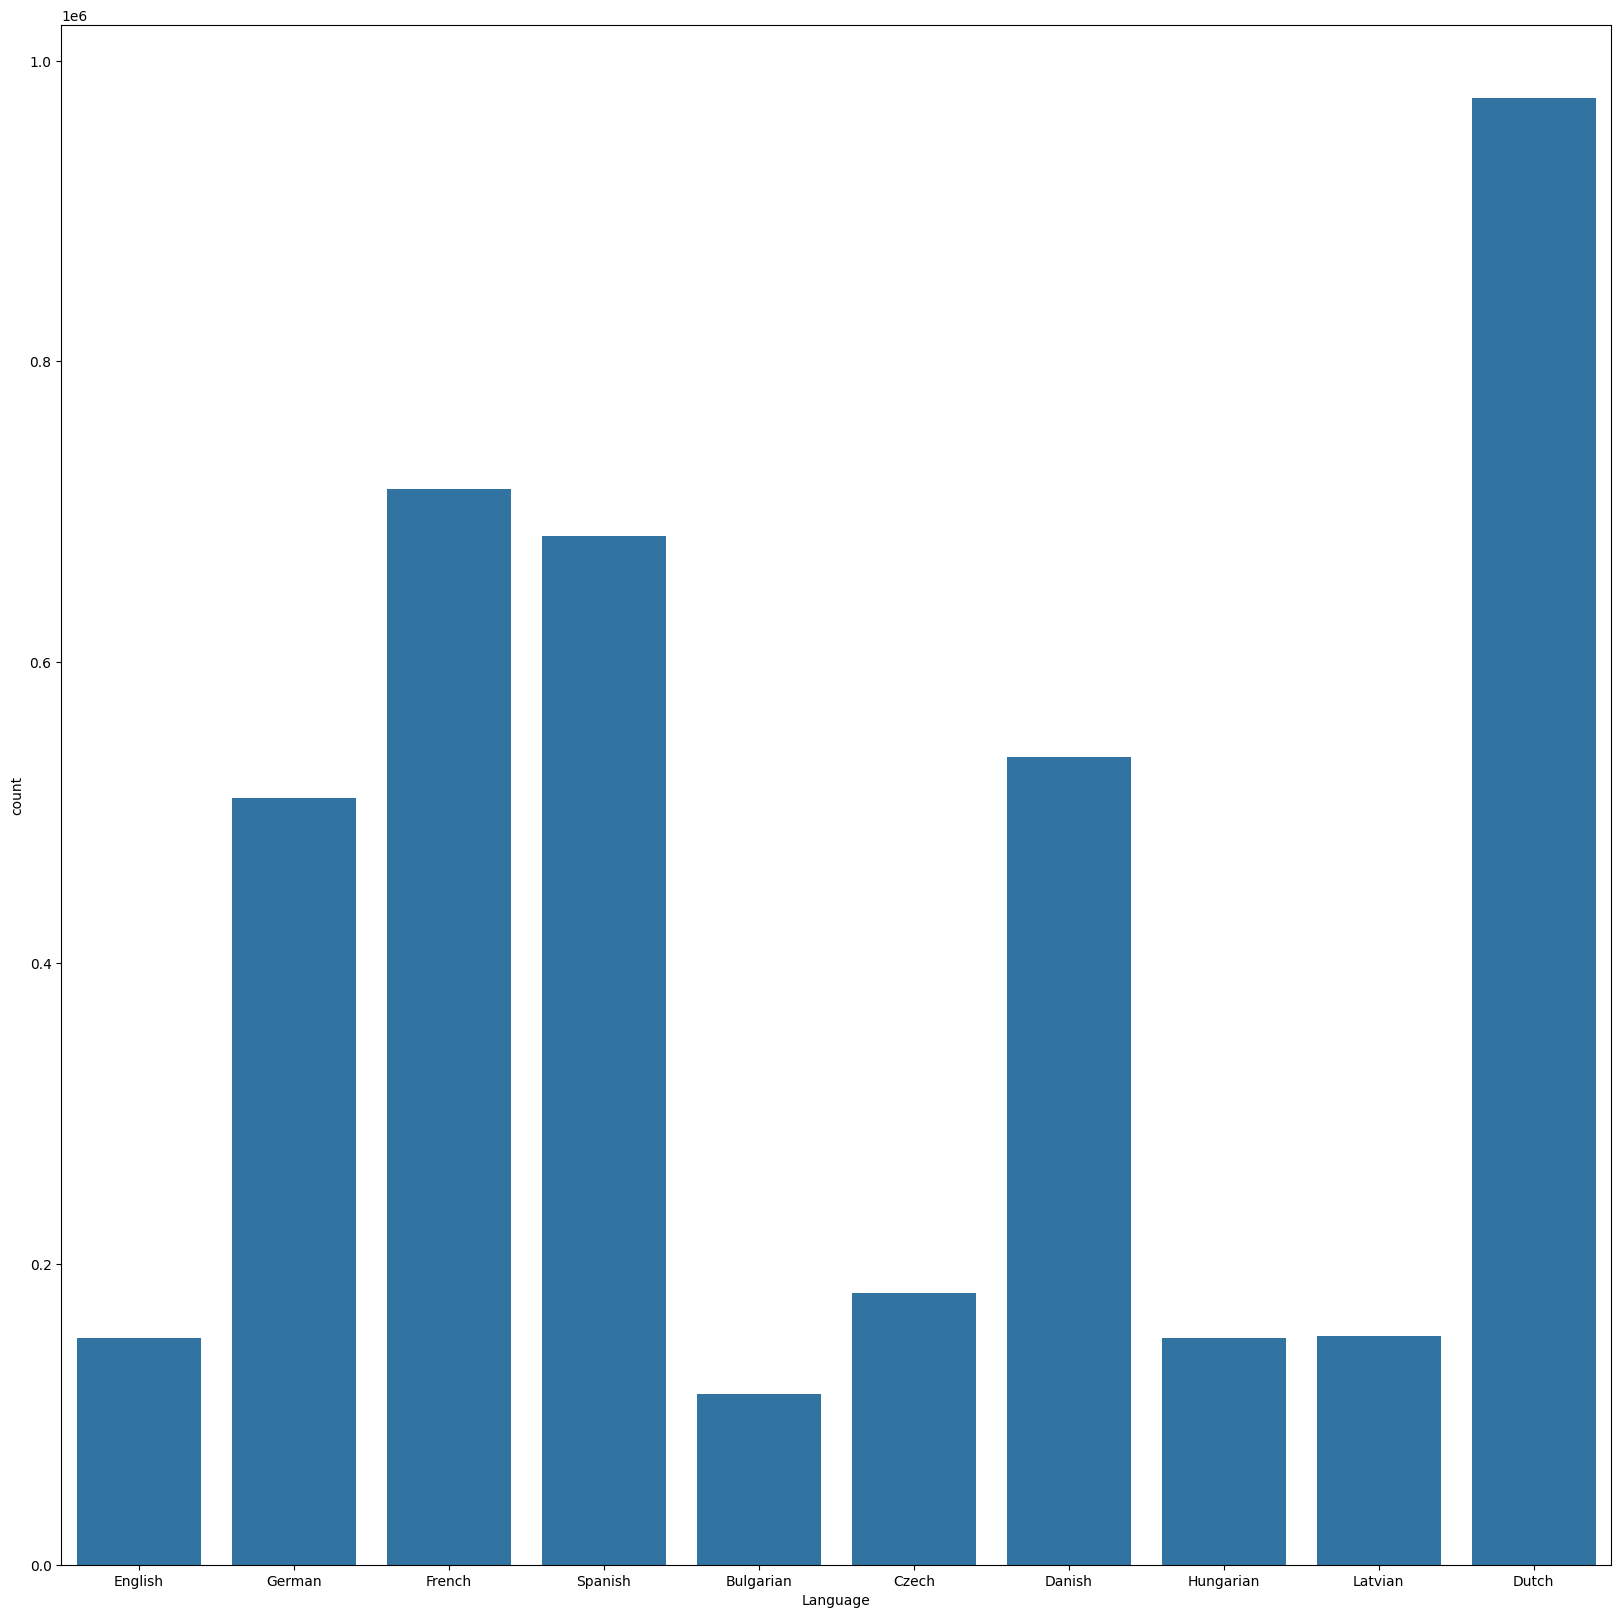

In [30]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

In [ ]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [32]:
y.head()


0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [33]:
x.head()


0                 membership of parliament see minutes
1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [35]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
# x = vectorizer.fit_transform(df['Text'])


In [36]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [37]:
pipe_mnb.fit(x_train, y_train)


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [38]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])


In [39]:
pipe_lr.fit(x_train, y_train)


c:\Users\Tejasv Kaushik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

In [40]:
lr_predicted = pipe_lr.predict(x_test)


In [41]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')


The logistic regression has: 99.02504959306106 % accuracy


In [42]:
mnb_predicted = pipe_mnb.predict(x_test)


In [43]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')


The MultinomialNB has : 98.56713833045889 % accuracy


In [44]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)


Confusion matrix: 
 [[ 22095      6      4      4     43     43     43      1      6    531]
 [    10  35718     15      5     21     21     16      7      8    640]
 [     1      8 106427     53     34     57     61      4      3   1039]
 [     1      7     57 193841     43     53     47      3      2   1021]
 [     3      5     24     16  29273     31     21      2      1    542]
 [     2     11     44     25     26 142091     32      5      2    957]
 [     2      6     71     41     35     35 100910      4      6    794]
 [    13      5     13      3     22     24     22  29408      8    600]
 [     8     12     11      6     21     30     18      0  29743    489]
 [     1      9     18     28     32     47     21      7      0 136151]]


In [47]:
import numpy as np

In [48]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


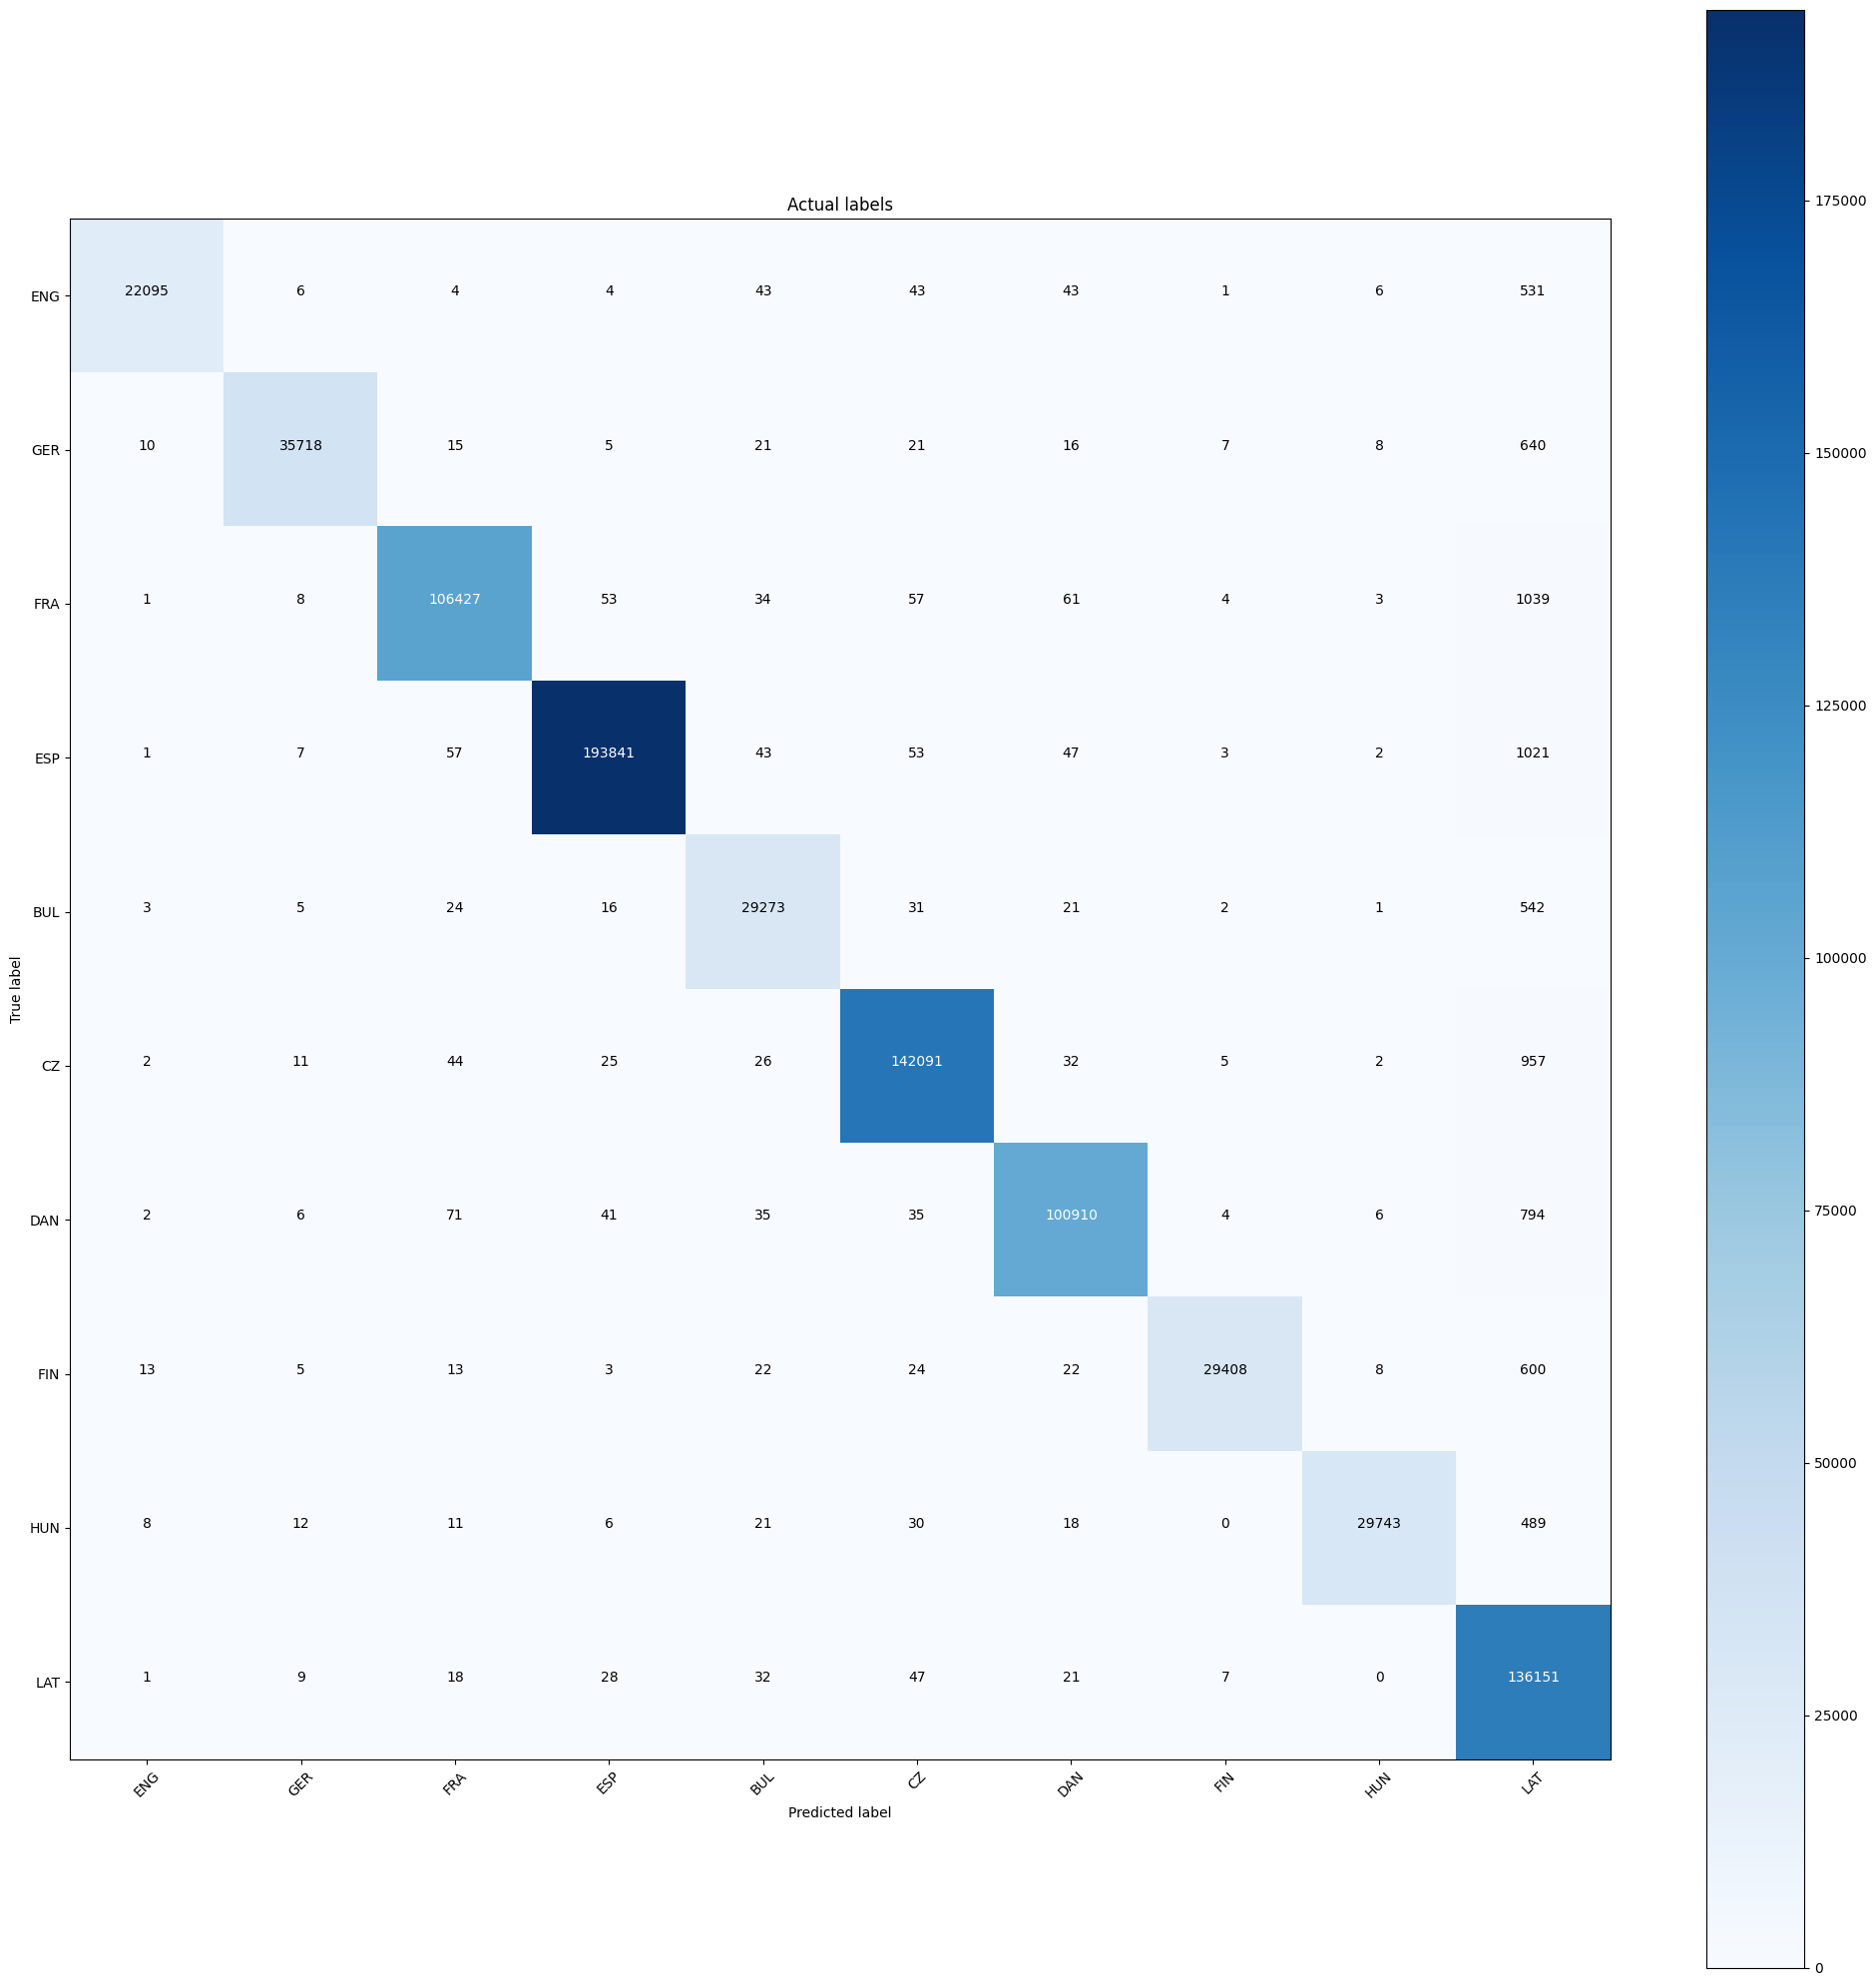

In [50]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['ENG', 'GER', 'FRA', 'ESP','BUL','CZ','DAN','FIN','HUN','LAT'])


In [51]:
import pickle


In [52]:
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()

In [ ]:
import pickle

# Load the Logistic Regression pipeline from the pickle file
with open('lrmodel.pckl', 'rb') as lrfile:
    loaded_pipe_lr = pickle.load(lrfile)

# Test with a custom sentence
custom_sentence = ["merci   becoup "]
lr_prediction = loaded_pipe_lr.predict(custom_sentence)
print("Prediction (Loaded LogisticRegression):", lr_prediction)

# Optionally, get probabilities
lr_proba = loaded_pipe_lr.predict_proba(custom_sentence)
print("Probabilities (Loaded LogisticRegression):", lr_proba)


Prediction (Loaded LogisticRegression): ['French']
Probabilities (Loaded LogisticRegression): [[3.15440968e-03 1.29654304e-02 7.94031388e-03 1.00068529e-02
  5.29484011e-02 9.02854322e-01 5.59988113e-04 2.29118263e-03
  3.37775764e-03 3.90134110e-03]]
